STAT3612 Homework 1: Bitcoin Prices
Name: Wong Chun Ho
UID: 3035277755

Step 1

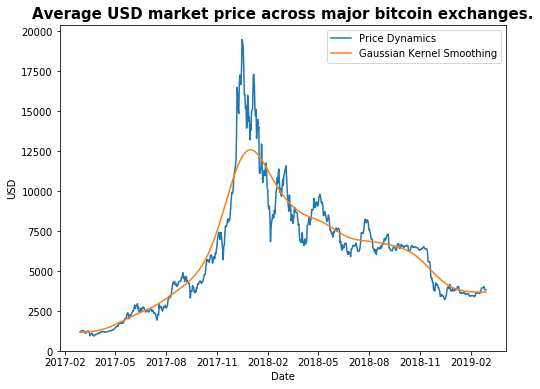

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('BitCoin.csv', names=['Date', 'Price'])
X = pd.to_datetime(data['Date'])
Y = data['Price']
plt.figure(1, figsize=(8, 6))
plt.title('Average USD market price across major bitcoin exchanges.', fontsize=15, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('USD')
plt.plot(X, Y)

from scipy.ndimage.filters import gaussian_filter1d

y_sm = gaussian_filter1d(Y, sigma=30)
plt.plot(X, y_sm)

plt.legend(labels=['Price Dynamics', 'Gaussian Kernel Smoothing'])
plt.show()

Step 2

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     45.30
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           3.43e-11
Time:                        23:54:48   Log-Likelihood:                -6984.9
No. Observations:                 730   AIC:                         1.397e+04
Df Residuals:                     728   BIC:                         1.398e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4501.0378    256.299     17.562      0.0

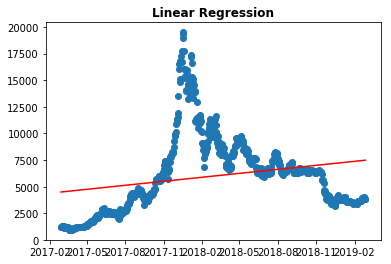

SSE = 8745389322.85181
R^2 = 0.058580321910817856
F-statistic = 45.300173072264386
Slope = 4.097137652352261
Level of significance = 3.426689998044683e-11


In [2]:
import statsmodels.api as sm

X1 = sm.add_constant(data.index)
lm = sm.OLS(Y, X1).fit()
print(lm.summary())

plt.plot(X, Y, 'o')
plt.plot(X, lm.predict(X1), color='red')
plt.title('Linear Regression', fontweight='bold')
plt.show()

SSE = lm.ssr
R_Sq = lm.rsquared
F = lm.fvalue
slope = lm.params[1]
slope_sig = lm.pvalues[1]

print('SSE = %s' % SSE)
print('R^2 = %s' % R_Sq)
print('F-statistic = %s' % F)
print('Slope = %s' % slope)
print('Level of significance = %s' % slope_sig)

Step 3

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     1006.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):          3.83e-210
Time:                        23:54:48   Log-Likelihood:                -6522.7
No. Observations:                 730   AIC:                         1.305e+04
Df Residuals:                     727   BIC:                         1.307e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1710.5605    198.441     -8.620      0.0

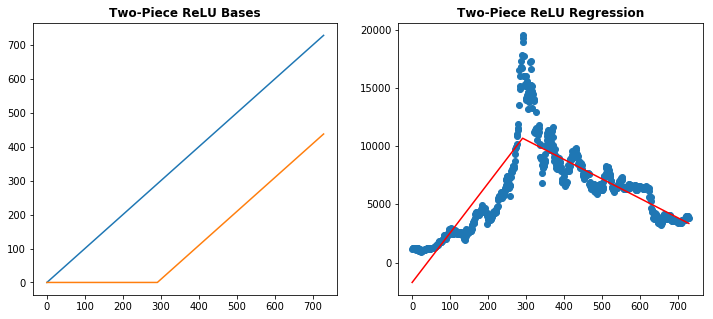

SSE = 2465382395.1448045
R^2 = 0.7346076412242434
F-statistic = 1006.1701806970242
Slope 1 = 42.542820132025184
Level of significance of slope 1 = 3.5802569476398583e-211
Slope 2 = -59.239581718401574
Level of significance of slope 2 = 4.528128658480866e-202


In [3]:
import numpy as np

def PieceReLU(x, tau):
    xphi = x
    for k in range(len(tau)):
        tmp = [max(x1-tau[k], 0) for x1 in x]
        xphi = np.column_stack((xphi, tmp))
    return xphi


tau = X.index[X == '2017-12-16'].tolist()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
xphi = PieceReLU(data.index, tau)

X2 = sm.add_constant(xphi)
lm = sm.OLS(Y, X2).fit()
print(lm.summary())

yfit = lm.predict(X2)
axs[0].plot(data.index, xphi)
axs[0].set_title('Two-Piece ReLU Bases', fontweight='bold')
axs[1].plot(data.index, Y, 'o')
axs[1].plot(data.index, yfit, color='red')
axs[1].set_title('Two-Piece ReLU Regression', fontweight='bold')

plt.show()

SSE = lm.ssr
R_Sq = lm.rsquared
F = lm.fvalue
slope1 = lm.params[1]
slope1_sig = lm.pvalues[1]
slope2 = lm.params[2]
slope2_sig = lm.pvalues[2]

print('SSE = %s' % SSE)
print('R^2 = %s' % R_Sq)
print('F-statistic = %s' % F)
print('Slope 1 = %s' % slope1)
print('Level of significance of slope 1 = %s' % slope1_sig)
print('Slope 2 = %s' % slope2)
print('Level of significance of slope 2 = %s' % slope2_sig)

Step 4

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     3148.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:54:48   Log-Likelihood:                -5944.5
No. Observations:                 730   AIC:                         1.190e+04
Df Residuals:                     725   BIC:                         1.192e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        399.4799    102.158      3.910      0.0

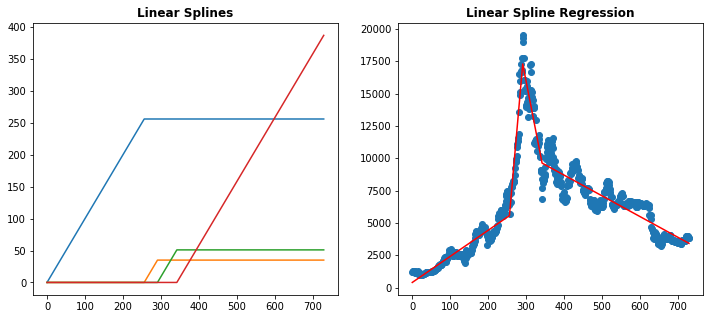

In [4]:
def PieceLinearSpline(x, tau):
    xphi = [min(max(x1-min(x), 0), tau[0]-min(x)) for x1 in x]
    for k in range(1,len(tau)):
        tmp = [min(max(x1-tau[k-1], 0), tau[k]-tau[k-1]) for x1 in x]
        xphi = np.column_stack((xphi, tmp))
    xphi = np.column_stack((xphi, [max(x1-tau[len(tau)-1], 0) for x1 in x]))
    return xphi

tau = []
for i in ['2017-11-11', '2017-12-16', '2018-02-05']:
    tau += X.index[X == i].tolist()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
xphi = PieceLinearSpline(data.index, tau)

X4 = sm.add_constant(xphi)
lm = sm.OLS(Y, X4).fit()
print(lm.summary())

yfit = lm.predict(X4)
axs[0].plot(data.index, xphi)
axs[0].set_title('Linear Splines', fontweight='bold')
axs[1].plot(data.index, Y, 'o')
axs[1].plot(data.index, yfit, color='red')
axs[1].set_title('Linear Spline Regression', fontweight='bold')

plt.show()

Conclusion: The rate of increment at 11 November 2017 increases significantly. The decrement at 16 December 2017 is significant. The rate of decrement at 5 February 2018 slows down significantly.

Step 5

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1085.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:56:32   Log-Likelihood:                -6166.3
No. Observations:                 730   AIC:                         1.235e+04
Df Residuals:                     723   BIC:                         1.238e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        832.3635    148.719      5.597      0.0

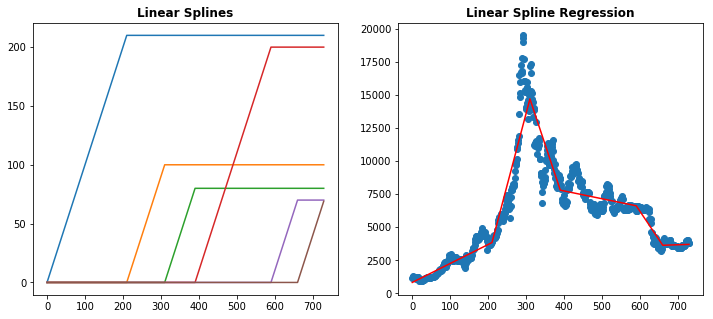

5 Estimated Knots:
Index	Date
210   2017-09-26
310   2018-01-04
390   2018-03-25
590   2018-10-11
660   2018-12-20
Name: Date, dtype: datetime64[ns]


In [6]:
# select n knots from y with local minimum SSE by greedy, with interval as the increment of knots
def selectKnots(y, n, interval):
    knot = []
    for i in range(1, n + 1):
        min_sse = -1
        min_tau = []
        for a in range(0, len(y), interval):
            if a in knot: continue
            tau = knot + [a]
            xphi = PieceLinearSpline(y.index, tau)
            XX = sm.add_constant(xphi)
            lm = sm.OLS(Y, XX).fit()
            sse = lm.ssr
            if min_sse == -1 or sse < min_sse:
                min_sse = sse
                min_tau = tau
        knot = min_tau
    knot.sort()
    return knot

knots = selectKnots(Y, n=5, interval=10)
# Setting interval=1 has very similar result with interval=10, but interval=1 is much slower

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
xphi = PieceLinearSpline(data.index, knots)

XX = sm.add_constant(xphi)
lm = sm.OLS(Y, XX).fit()
print(lm.summary())

yfit = lm.predict(XX)
axs[0].plot(data.index, xphi)
axs[0].set_title('Linear Splines', fontweight='bold')
axs[1].plot(data.index, Y, 'o')
axs[1].plot(data.index, yfit, color='red')
axs[1].set_title('Linear Spline Regression', fontweight='bold')

plt.show()

print('5 Estimated Knots:\nIndex\tDate')
print(X[knots])